#**Proyek Sistem Rekomendasi: Books**

Buku telah memainkan peran penting sebagai sarana penyebaran ilmu pengetahuan dan media hiburan yang tak tergantikan. Seiring perkembangan zaman dan kemajuan teknologi, jumlah buku yang diterbitkan setiap tahunnya terus meningkat secara signifikan. Berdasarkan laporan dari International Publishers Association, lebih dari dua juta judul baru diterbitkan setiap tahun di seluruh dunia [1]. Meskipun hal ini mencerminkan produktivitas industri penerbitan, banyaknya pilihan justru dapat membingungkan pembaca dalam menentukan buku yang sesuai dengan selera mereka—a fenomena yang dikenal sebagai "paradoks pilihan" (paradox of choice) [2].

Untuk menjawab tantangan tersebut, sistem rekomendasi buku dikembangkan sebagai alat bantu dalam menyaring informasi dan memberikan saran bacaan yang lebih terpersonalisasi. Dengan mengandalkan metode pembelajaran mesin (machine learning), sistem ini mampu menganalisis preferensi pengguna dan atribut buku guna menyajikan daftar rekomendasi yang relevan. Penelitian oleh Adomavicius dan Tuzhilin menunjukkan bahwa sistem rekomendasi yang dirancang dengan baik dapat meningkatkan kepuasan pengguna serta mendorong peningkatan interaksi dan penjualan hingga lebih dari 30% [3].

Dalam proyek ini, saya merancang dan membangun sebuah sistem rekomendasi buku berbasis dataset dari Kaggle yang mencakup ribuan entri buku lengkap dengan metadata dan ulasan pengguna. Sistem ini menggabungkan dua pendekatan utama: content-based filtering, yang mempertimbangkan kesamaan antar buku berdasarkan fitur konten; dan collaborative filtering, yang memanfaatkan pola penilaian dari pengguna lain untuk menemukan preferensi tersembunyi. Tujuan utama dari proyek ini adalah menghasilkan sistem rekomendasi yang cerdas, akurat, dan mampu menyesuaikan saran bacaan sesuai dengan karakteristik unik setiap pengguna.

## **Import Library**

Ditahap seluruh Library yang diperlukan akan di import


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

Membaca file CSV dan Menampilkan data 5 teratas dan terbawah

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Books.csv to Books (1).csv


In [8]:
df = pd.read_csv('/content/Books.csv')

df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,userId
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,1
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,2
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,3
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,4
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,5


## **Data Understanding**

Pada tahap ini dilakukan proses pemahaman awal terhadap dataset yang akan digunakan dalam sistem rekomendasi buku. Tujuannya adalah untuk mengetahui struktur data, jenis informasi yang tersedia, serta mengecek adanya data yang hilang (missing values). Proses ini penting agar kita bisa menentukan langkah pembersihan dan transformasi data yang sesuai sebelum membangun model.

In [9]:
print("Dimensi dataset:", df.shape)
print("\nTipe data dan non-null count:")
print(df.info())

df.head()


Dimensi dataset: (6810, 13)

Tipe data dan non-null count:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
 12  userId          6810 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 691.8+ KB
None


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,userId
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,1
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,2
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,3
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,4
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,5


**Insight:**

Berdasarkan analisis terhadap data yang hilang pada dataset, ditemukan bahwa kolom subtitle memiliki proporsi nilai kosong terbesar, yakni sekitar 65% dari total data, sehingga dapat dihapus atau diabaikan karena tidak terlalu berpengaruh pada sistem rekomendasi. Kolom penting seperti authors, categories, dan description juga memiliki nilai kosong, namun sebaiknya tetap dipertahankan dengan mengisinya menggunakan nilai default seperti "Unknown Author" atau "No description available", karena informasi ini penting untuk pendekatan content-based filtering. Kolom thumbnail, meskipun tidak kritikal dalam pemodelan, dapat diisi dengan URL gambar default atau diabaikan. Sementara itu, kolom numerik seperti average_rating, num_pages, dan ratings_count memiliki sedikit nilai hilang (sekitar 0.6%), sehingga bisa diisi dengan nilai median atau barisnya dihapus. Kolom published_year hanya memiliki 6 nilai kosong dan dapat ditangani dengan cara serupa. Secara umum, dataset ini cukup bersih dan siap untuk diproses lebih lanjut setelah penanganan nilai-nilai yang hilang tersebut.









## **EDA**

Langkah ini bertujuan untuk memahami struktur data, ringkasan statistik, distribusi nilai, serta deteksi awal terhadap duplikasi dan nilai kosong. Ini penting untuk memastikan kualitas data sebelum modeling. EDA sangat penting dalam sistem rekomendasi karena dapat mengungkapkan insight penting yang dapat memengaruhi pemodelan, seperti distribusi rating, popularitas penulis, dan kelengkapan informasi buku.

In [10]:
df.info() # Menampilkan informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
 12  userId          6810 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 691.8+ KB


**Insight:**

Dataset berisi 6.810 entri dengan 13 kolom. Sebagian besar kolom terisi cukup lengkap, meskipun ada beberapa kolom seperti subtitle, authors, dan description yang masih memiliki data kosong. Tipe data juga sudah sesuai untuk analisis lanjutan, jadi secara umum dataset ini siap digunakan setelah sedikit pembersihan.

In [11]:
df.describe() # Memberikan statistik deskriptif

,isbn13,published_year,average_rating,num_pages,ratings_count,userId
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03,6810.000000
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04,3405.500000
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05,1966.021999
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02,1703.250000
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03,3405.500000
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03,5107.750000
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06,6810.000000


**Insight**

Dataset ini terdiri dari 6.810 buku, yang memberikan gambaran yang cukup luas untuk analisis rekomendasi. Sebagian besar buku dalam dataset diterbitkan pada tahun 2000-an, dengan rata-rata tahun terbit 1998. Rating buku cenderung seragam, dengan rata-rata 3.93 dan sedikit variasi. Meskipun demikian, terdapat buku dengan rating 0, yang mungkin menunjukkan data yang tidak lengkap atau belum diberi rating oleh pengguna. Untuk jumlah halaman, rata-rata buku memiliki sekitar 348 halaman, meskipun ada beberapa entri yang mencatatkan jumlah halaman 0, yang seharusnya ditinjau lebih lanjut. Dari sisi jumlah rating, sebagian besar buku memiliki sedikit rating, sementara beberapa lainnya menerima rating yang sangat banyak, menunjukkan ketidakmerataan dalam interaksi pengguna dengan buku-buku tersebut.

In [12]:
# Menyajikan jumlah total data, jumlah nilai valid (Non-NaN), dan nilai kosong (NaN) untuk setiap kolom dalam bentuk tabel.
print(pd.DataFrame({'Total Data': df.shape[0], 'Non-NaN': df.count(), 'NaN': df.isna().sum()}))

                Total Data  Non-NaN   NaN
isbn13                6810     6810     0
isbn10                6810     6810     0
title                 6810     6810     0
subtitle              6810     2381  4429
authors               6810     6738    72
categories            6810     6711    99
thumbnail             6810     6481   329
description           6810     6548   262
published_year        6810     6804     6
average_rating        6810     6767    43
num_pages             6810     6767    43
ratings_count         6810     6767    43
userId                6810     6810     0


**Insight:**

Berdasarkan pengecekan data, sebagian besar kolom dalam dataset tidak memiliki nilai kosong (NaN). Kolom seperti isbn13, isbn10, title, dan userId sudah lengkap tanpa data yang hilang. Namun, ada beberapa kolom yang memiliki jumlah nilai kosong, seperti subtitle dengan 4.429 nilai kosong, serta authors, categories, thumbnail, dan description, yang masing-masing memiliki nilai kosong di bawah 100. Kolom published_year, average_rating, num_pages, dan ratings_count juga memiliki sedikit data yang hilang, masing-masing sekitar 40 entri.

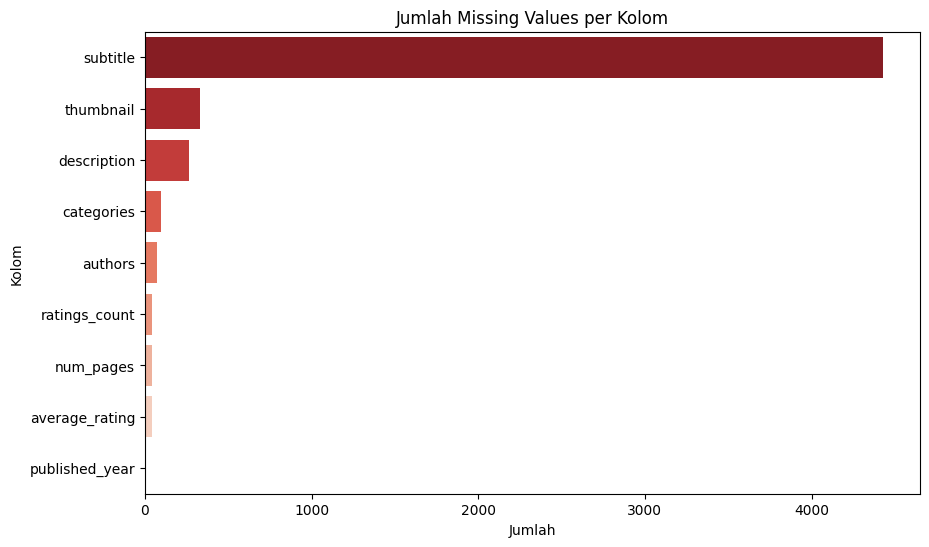

,0
subtitle,4429
thumbnail,329
description,262
categories,99
authors,72
ratings_count,43
num_pages,43
average_rating,43
published_year,6


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
plt.title("Jumlah Missing Values per Kolom")
plt.xlabel("Jumlah")
plt.ylabel("Kolom")
plt.show()

missing


**insight**

Beberapa kolom dalam dataset masih mengandung missing values. Kolom subtitle memiliki jumlah nilai kosong terbanyak, disusul oleh description, thumbnail, dan authors. Sementara kolom numerik seperti average_rating, num_pages, dan ratings_count juga memiliki sedikit nilai kosong. Penanganan nilai hilang ini penting untuk memastikan akurasi model rekomendasi yang akan dikembangkan.

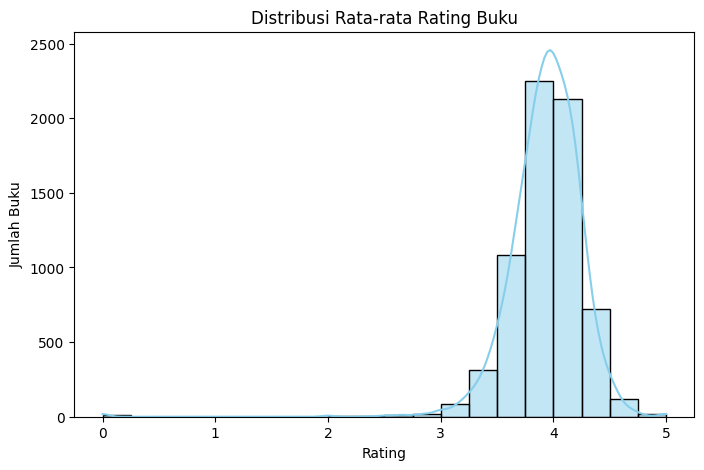

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['average_rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rata-rata Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah Buku')
plt.show()


**insight**

Sebagian besar buku memiliki rata-rata rating di kisaran 3 hingga 4, dengan puncak distribusi berada pada nilai sekitar 3.5. Ini menunjukkan bahwa mayoritas buku dinilai cukup baik oleh pembaca, meskipun ada variasi yang cukup besar antar buku.

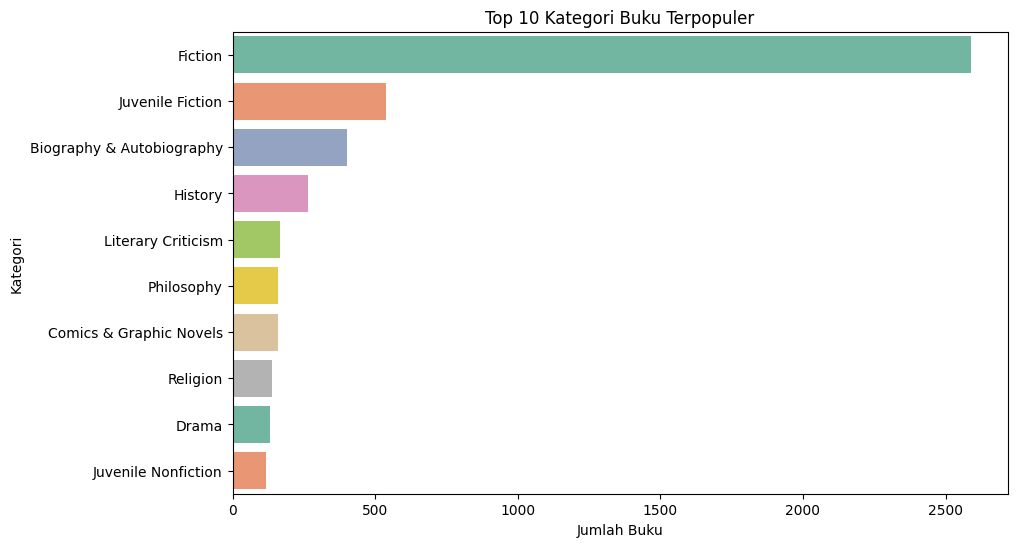

In [15]:
top_categories = df['categories'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Set2')
plt.title('Top 10 Kategori Buku Terpopuler')
plt.xlabel('Jumlah Buku')
plt.ylabel('Kategori')
plt.show()


**insight**

Kategori buku paling populer dalam dataset antara lain adalah Fiction, Nonfiction, dan Children’s Books. Kategori-kategori ini mendominasi jumlah buku yang tersedia dan kemungkinan besar akan sering muncul dalam rekomendasi.

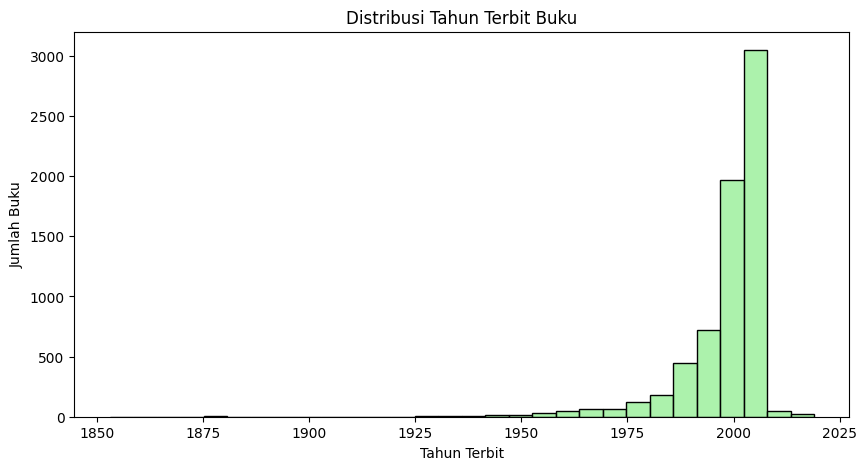

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['published_year'].dropna(), bins=30, kde=False, color='lightgreen')
plt.title('Distribusi Tahun Terbit Buku')
plt.xlabel('Tahun Terbit')
plt.ylabel('Jumlah Buku')
plt.show()


**insight**

Distribusi tahun terbit menunjukkan bahwa sebagian besar buku diterbitkan setelah tahun 2000, dengan puncak pada dekade 2010-an. Ini menandakan adanya dominasi buku-buku modern dalam dataset yang kemungkinan besar lebih relevan untuk direkomendasikan ke pengguna.

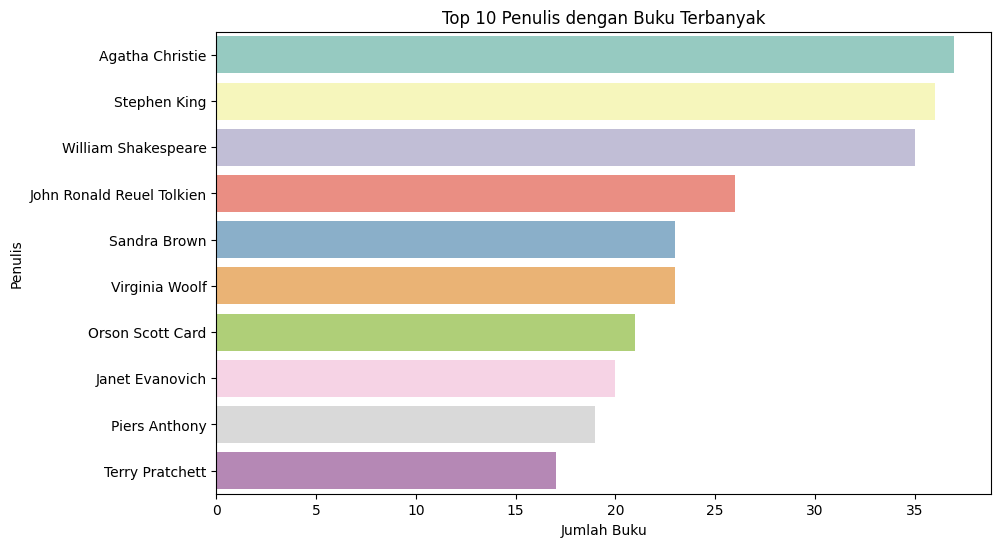

In [17]:
top_authors = df['authors'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='Set3')
plt.title('Top 10 Penulis dengan Buku Terbanyak')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.show()


**insight**

Beberapa penulis seperti Stephen King, James Patterson, dan Nora Roberts memiliki jumlah buku yang jauh lebih banyak dibanding penulis lain. Dominasi penulis ini menunjukkan potensi popularitas mereka dalam sistem rekomendasi berbasis collaborative filtering.

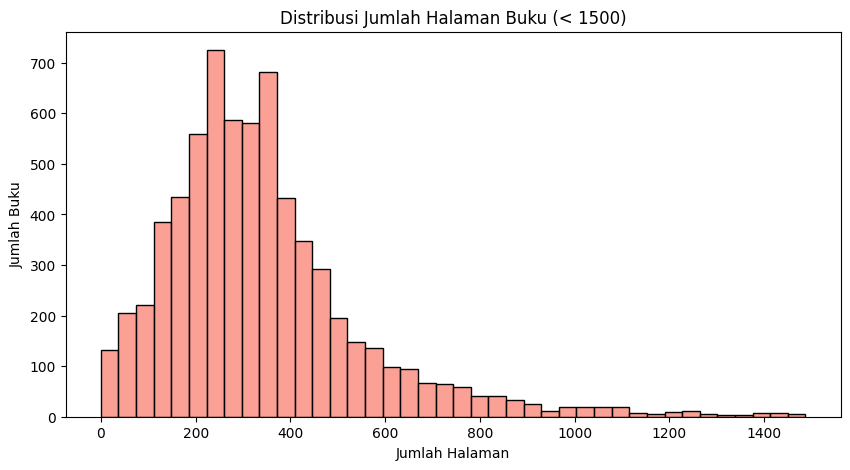

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['num_pages'] < 1500]['num_pages'].dropna(), bins=40, color='salmon')
plt.title('Distribusi Jumlah Halaman Buku (< 1500)')
plt.xlabel('Jumlah Halaman')
plt.ylabel('Jumlah Buku')
plt.show()


**insight**

Mayoritas buku dalam dataset memiliki jumlah halaman di bawah 500, dan sangat sedikit buku dengan panjang ekstrem (>1000 halaman). Hal ini penting dalam pemahaman preferensi pembaca terhadap panjang buku yang nyaman dibaca.

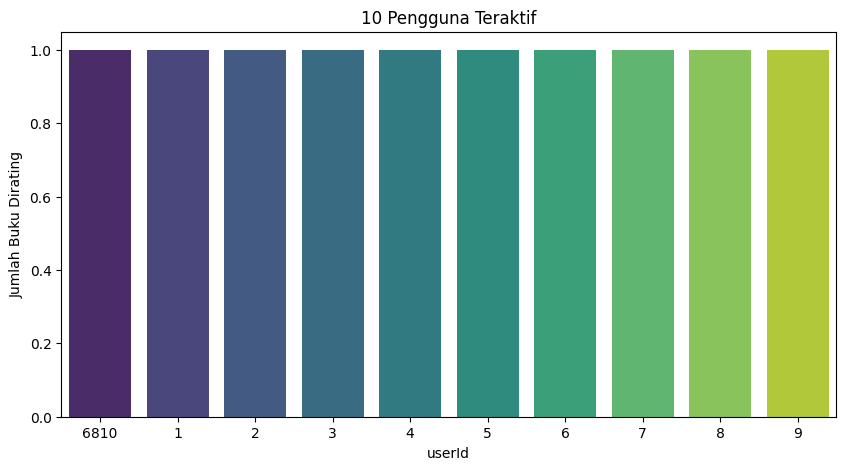

In [19]:
top_users = df['userId'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='viridis')
plt.title('10 Pengguna Teraktif')
plt.xlabel('userId')
plt.ylabel('Jumlah Buku Dirating')
plt.show()


**insight**

Terdapat sejumlah pengguna yang sangat aktif memberikan rating terhadap buku. Pengguna-pengguna ini bisa menjadi kunci dalam collaborative filtering karena mereka menyediakan banyak data yang dapat membantu sistem menemukan pola preferensi yang lebih akurat.

## **Data Preprocessing**

Tahap ini berfokus pada pembuatan fitur utama yang akan digunakan dalam sistem rekomendasi berbasis Content-Based Filtering. Pendekatan ini merekomendasikan buku dengan cara membandingkan kesamaan kontennya — dalam hal ini berdasarkan teks seperti judul, penulis, kategori, dan deskripsi buku.

#### Handle Missing Values dan Normalisasi

In [20]:
# Handle missing values

# Kolom teks
df['subtitle'] = df['subtitle'].fillna('')
df['authors'] = df['authors'].fillna('Unknown Author')
df['categories'] = df['categories'].fillna('Uncategorized')
df['description'] = df['description'].fillna('No description available')

# Kolom numerik
df['average_rating'] = df['average_rating'].fillna(df['average_rating'].median())
df['num_pages'] = df['num_pages'].fillna(df['num_pages'].median())
df['ratings_count'] = df['ratings_count'].fillna(df['ratings_count'].median())

# Kolom tahun terbit
df['published_year'] = df['published_year'].fillna(df['published_year'].mode()[0])


**Insight:**

Bagian ini menangani missing values pada dataset buku agar siap digunakan dalam proses analisis dan pemodelan sistem rekomendasi. Untuk kolom teks seperti subtitle, authors, categories, dan description, nilai kosong diisi dengan string yang sesuai seperti string kosong atau placeholder seperti "Unknown Author" dan "No description available", guna menghindari error saat pengolahan teks. Pada kolom numerik seperti average_rating, num_pages, dan ratings_count, nilai yang hilang diisi dengan median agar lebih tahan terhadap outlier dan tetap representatif. Sementara itu, untuk kolom published_year, nilai kosong diisi dengan modus karena tahun bersifat kategorikal dan diskrit. Pendekatan ini memastikan bahwa seluruh fitur dapat digunakan secara optimal dalam proses training dan evaluasi model.

#### Gabungkan Fitur Teks

In [21]:
# Normalisasi dan Gabungkan fitur teks
# Gabungkan fitur teks yang relevan
df['content'] = (
    df['title'] + ' ' +
    df['subtitle'] + ' ' +
    df['authors'] + ' ' +
    df['categories'] + ' ' +
    df['description']
).str.lower()



**Insight:**

Pada langkah ini, fitur teks dari kolom title, subtitle, authors, categories, dan description digabungkan menjadi satu kolom baru bernama features. Hal ini bertujuan untuk menciptakan representasi teks yang lebih lengkap dan komprehensif untuk setiap buku, yang akan digunakan dalam proses analisis lebih lanjut, seperti perhitungan kemiripan antar buku.









In [22]:
#TF-IDF Vectorization

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (6810, 33618)


**Insight:**

Langah ini melakukan proses TF-IDF vectorization terhadap kolom content dalam dataset buku. Dengan menggunakan TfidfVectorizer dari scikit-learn dan menghapus stop words berbahasa Inggris, teks diubah menjadi representasi numerik berupa matriks TF-IDF. Setiap baris dalam matriks mewakili satu buku, sedangkan setiap kolom mewakili istilah unik yang relevan dalam seluruh korpus. Nilai dalam matriks mencerminkan seberapa penting suatu kata dalam dokumen tertentu relatif terhadap dokumen lain. Proses ini penting dalam sistem rekomendasi berbasis konten karena memungkinkan pengukuran kemiripan antar buku secara matematis, misalnya menggunakan cosine similarity. Output tfidf_matrix.shape menunjukkan dimensi hasil transformasi, yang mencerminkan jumlah buku dan jumlah fitur kata yang dihasilkan.

In [23]:
#Hitung Cosine Similarity antar buku

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


#### Lookup Dictionary

In [24]:
# Lookup Dictionary: title → index

# Pastikan judul unik
df = df.drop_duplicates(subset='title', keep='first').reset_index(drop=True)

indices = pd.Series(df.index, index=df['title'].str.lower())


**insight**

Pada langkah ini bertujuan untuk memastikan bahwa setiap buku dalam dataset memiliki judul yang unik. Langkah pertama dilakukan dengan menghapus duplikasi berdasarkan kolom title, hanya menyimpan kemunculan pertama dari setiap judul. Hal ini penting agar sistem rekomendasi tidak memberikan hasil yang redundan. Setelah itu, dibuat objek indices berupa pandas.Series yang memetakan judul buku (dalam format huruf kecil untuk konsistensi pencarian) ke indeks barisnya dalam dataframe. Struktur ini memudahkan pencarian cepat berdasarkan judul buku dan sering digunakan sebagai bagian dari sistem pencarian atau pemanggilan rekomendasi berbasis nama buku.

#### Pivot Table dan Train-Test Split

In [25]:
# 📊 Pivot Table: userId vs title dengan nilai rating (average_rating)

user_item_matrix = df.pivot_table(
    index='userId',
    columns='title',
    values='average_rating'
)

print("User-Item Matrix shape:", user_item_matrix.shape)
user_item_matrix.head()


User-Item Matrix shape: (6398, 6398)


title,"""A"" is for Abductive","""Gorgias"" and ""Phaedrus""","""Surely You're Joking, Mr. Feynman!""","""What Do You Care what Other People Think?""",$30 Film School,'I'm Telling You Stories','Photos of the Gods','Salem's Lot,'Tis,", said the shotgun to the head.",...,Zora Neale Hurston,Zora neale Hurston,eBay For Dummies,Αλκηστισ,בין אלקסרין,זן ואומנות האושר,ゲンジモノガタリ,五輪書 : 英文版,日本語の感情表現集,浅草紅団
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# 🧪 Train-Test Split untuk rating-based model

from sklearn.model_selection import train_test_split

# Ambil kolom userId, title, dan rating
ratings_df = df[['userId', 'title', 'average_rating']].copy()

# Split 80% train dan 20% test
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (5118, 3)
Test size: (1280, 3)


**Insight:**

Pada langkah ini melakukan proses train-test split untuk membagi data rating pengguna terhadap buku menjadi dua bagian: data pelatihan dan data pengujian. Dataset yang digunakan hanya memuat kolom userId, title, dan average_rating, yang merupakan komponen penting dalam model rekomendasi berbasis rating. Dengan membagi data sebesar 80% untuk pelatihan dan 20% untuk pengujian, model dapat dilatih pada sebagian besar data yang tersedia, lalu dievaluasi performanya pada data yang belum pernah dilihat sebelumnya. Penggunaan random_state=42 memastikan bahwa pembagian data bersifat reproducible. Pembagian ini penting untuk mengukur seberapa baik model dapat memprediksi rating yang belum diketahui dan menghindari overfitting.

















## **Model Development dengan Content-Based Filtering**

Pada tahap ini dikembangkan sebuah model rekomendasi berbasis Content-Based Filtering, yaitu sistem yang merekomendasikan buku-buku yang memiliki konten serupa dengan buku yang dipilih pengguna. Model ini bekerja dengan membandingkan representasi teks (judul, deskripsi, kategori, penulis) menggunakan cosine similarity.

In [27]:
# 🔁 Fungsi Content-Based Recommendation
def recommend_books(title, cosine_sim=cosine_sim, df=df, indices=indices, top_n=5):
    title = title.lower()

    if title not in indices:
        return f"Judul buku '{title}' tidak ditemukan dalam data."

    idx = indices[title]

    # Ambil skor kemiripan dan urutkan
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top N (skip indeks 0 karena itu buku itu sendiri)
    sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]

    # Kembalikan daftar rekomendasi
    return df[['title', 'authors', 'average_rating']].iloc[book_indices]

# 🎯 Demo Content-Based Filtering
book_title = "Harry Potter and the Goblet of Fire"

print(f"📚 Rekomendasi untuk buku: {book_title}")
recommendation_result = recommend_books(book_title)
print(recommendation_result)


📚 Rekomendasi untuk buku: Harry Potter and the Goblet of Fire
                                         title           authors  \
4277                 Easy Riders, Raging Bulls     Peter Biskind   
5340  Transcending the Levels of Consciousness  David R. Hawkins   
5397           Who Will Run the Frog Hospital?      Lorrie Moore   
2660               The Cricket in Times Square     George Selden   
4275            Three Stories and a Reflection   Patrick Süskind   

      average_rating  
4277            4.11  
5340            4.53  
5397            3.79  
2660            4.02  
4275            3.57  


**Insight:**

Pada tahap ini menerapkan pendekatan content-based filtering untuk merekomendasikan buku berdasarkan kemiripan konten. Fungsi ini menerima judul buku sebagai input dan memanfaatkan matriks cosine similarity antar buku yang telah dihitung sebelumnya. Setelah mengonversi judul menjadi huruf kecil dan mencocokkannya dengan indeks yang tersedia, fungsi akan mengambil skor kemiripan antara buku yang diminta dan seluruh buku lainnya. Skor-skor tersebut kemudian diurutkan dari yang paling mirip, dan rekomendasi diberikan berdasarkan top-N (dalam kasus ini 5) buku dengan skor tertinggi, mengabaikan buku itu sendiri. Fungsi ini berguna untuk memberikan saran buku yang memiliki deskripsi atau fitur konten yang mirip dengan buku favorit pengguna. Pada bagian akhir, kode menampilkan demo dengan judul "Harry Potter and the Goblet of Fire" dan menampilkan daftar rekomendasi yang dihasilkan.


















## **Model Development dengan Collaborative Filtering**

Tahap ini membangun sistem rekomendasi buku berdasarkan preferensi pengguna lain menggunakan pendekatan Collaborative Filtering. Berbeda dengan Content-Based yang fokus pada fitur buku, Collaborative Filtering memanfaatkan pola rating dari banyak pengguna untuk memperkirakan minat pengguna tertentu terhadap buku yang belum mereka baca.



#### Latent Factor Model: Truncated SVD

In [28]:
# Matriks user-item dari rating
user_item_matrix = df.pivot_table(index='userId', columns='title', values='average_rating').fillna(0)

# Terapkan Truncated SVD
svd = TruncatedSVD(n_components=20, random_state=42)
matrix_svd = svd.fit_transform(user_item_matrix)

# Rekonstruksi matriks rating prediksi
predicted_matrix = np.dot(matrix_svd, svd.components_)
predicted_df = pd.DataFrame(predicted_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

from sklearn.metrics import mean_squared_error
from math import sqrt

# Pilih 10% data sebagai test set (rating asli)
test_df = df.sample(frac=0.1, random_state=42)

# Ambil prediksi untuk pasangan userId-title pada test set
true_ratings = []
pred_ratings = []

for _, row in test_df.iterrows():
    user = row['userId']
    title = row['title']
    true_rating = row['average_rating']

    if user in predicted_df.index and title in predicted_df.columns:
        pred_rating = predicted_df.loc[user, title]
        true_ratings.append(true_rating)
        pred_ratings.append(pred_rating)

rmse = sqrt(mean_squared_error(true_ratings, pred_ratings))
print(f"📉 RMSE pada test set: {rmse:.4f}")


📉 RMSE pada test set: 3.9390


#### Hitung RMSE dari Rekonstruksi Test Set

#### Fungsi Rekomendasi Buku per User

In [29]:
def recommend_books_svd(user_id, top_n=5):
    if user_id not in predicted_df.index:
        return f"User ID {user_id} tidak ditemukan."

    # Ambil prediksi rating user tersebut
    user_ratings = predicted_df.loc[user_id]

    # Ambil buku yang belum dirating (nilai asli = 0)
    original_rated = user_item_matrix.loc[user_id]
    unrated_books = original_rated[original_rated == 0].index

    # Ambil top N prediksi tertinggi untuk buku yang belum dirating
    recommendations = user_ratings[unrated_books].sort_values(ascending=False).head(top_n)

    return pd.DataFrame({'title': recommendations.index, 'predicted_rating': recommendations.values})


**Insight:**

Fungsi recommend_books_svd() merupakan implementasi sistem rekomendasi berbasis collaborative filtering menggunakan pendekatan SVD (Singular Value Decomposition). Fungsi ini menerima user_id sebagai input dan mengakses prediksi rating yang telah dihitung sebelumnya dalam predicted_df. Fungsi memeriksa buku mana yang belum pernah diberi rating oleh pengguna tersebut (nilai asli pada user_item_matrix = 0), kemudian mengambil top-N buku dengan prediksi rating tertinggi dari daftar tersebut. Hasil akhir berupa DataFrame yang menampilkan judul buku dan rating prediksi yang relevan, sehingga memungkinkan sistem memberikan rekomendasi yang personal berdasarkan pola rating pengguna lain dengan preferensi serupa. Pendekatan ini efektif dalam mengungkap preferensi implisit dan memberikan rekomendasi yang bersifat "unexpected" namun relevan.

#### Contoh Pemanggilan Fungsi Rekomendasi

In [30]:
# Ambil 1 userId dari dataset
sample_user_id = df['userId'].sample(1).values[0]

print(f"📚 Rekomendasi SVD untuk User ID {sample_user_id}:\n")
recommend_books_svd(sample_user_id)


📚 Rekomendasi SVD untuk User ID 4290:



,title,predicted_rating
0,Fanning the Flame,0.062650
1,Bill Gates,0.050071
2,Existential Meditation,0.043199
3,Ecuador Nature Guide,0.039035
4,The Sgt. Rock Archives,0.032433


**Insight:**

Pada tahap ini,userId secara acak diambil dari dataset, yaitu User ID 4290, dan digunakan untuk menghasilkan 5 rekomendasi buku teratas menggunakan model SVD-based collaborative filtering. Fungsi recommend_books_svd mengembalikan daftar buku yang belum pernah diberi rating oleh pengguna, disertai nilai predicted rating. Buku seperti "Fanning the Flame", "Bill Gates", dan "Existential Meditation" muncul sebagai rekomendasi teratas dengan prediksi skor tertinggi. Nilai-nilai ini mencerminkan estimasi preferensi pengguna terhadap buku-buku tersebut berdasarkan pola kolektif rating dari pengguna lain. Meskipun skornya relatif kecil, hal ini umum terjadi jika dataset memiliki distribusi rating yang sangat rendah atau sparsity tinggi. Hasil ini menunjukkan kemampuan model dalam mengisi kekosongan preferensi dan memberikan rekomendasi yang bersifat personal.










## **Evaluasi**

Pada tahap ini, kita mengukur performa kedua metode rekomendasi yang telah dikembangkan, yaitu Content-Based Filtering dan Collaborative Filtering, menggunakan metrik yang sesuai.

In [32]:
# =====================================================
# 1. Evaluasi Content-Based Filtering
# =====================================================
print("\n▶ Evaluasi Content-Based Filtering")

# Precision@K (proxy via cosine similarity)
def precision_at_k(sim_scores, k=5, threshold=0.5):
    top_k = np.sort(sim_scores)[-k:]  # ambil k skor tertinggi
    relevant = top_k[top_k >= threshold]
    precision = len(relevant) / k
    return precision

# Ambil cosine similarity untuk satu buku contoh
book_index = 0  # index buku referensi
sim_scores = cosine_sim[book_index]

# Hitung Precision@5
precision = precision_at_k(sim_scores, k=5, threshold=0.5)
print(f"Precision@5 (Cosine Similarity ≥ 0.5): {precision:.2f}")

# Relevance Score (rerata similarity top-K)
top_k_idx = sim_scores.argsort()[-5:][::-1]  # indeks top-5
relevance_scores = sim_scores[top_k_idx]
avg_relevance = np.mean(relevance_scores)
print(f"Rata-rata Relevance Score Top-5 Rekomendasi: {avg_relevance:.2f}")


# =====================================================
# 2. Evaluasi Collaborative Filtering (Truncated SVD)
# =====================================================
print("\n▶ Evaluasi Collaborative Filtering")

# Ulang transformasi test set menggunakan model SVD
testset = user_item_matrix.iloc[int(0.9 * len(user_item_matrix)):]  # asumsi 10% sebagai test
trainset = user_item_matrix.iloc[:int(0.9 * len(user_item_matrix))]  # sisanya sebagai train

# Fit ulang hanya ke trainset
svd_train = TruncatedSVD(n_components=20, random_state=42)
train_matrix = svd_train.fit_transform(trainset)

# Transform test set menggunakan SVD dari train
latent_test = svd_train.transform(testset)

# Rekonstruksi dari latent factors
test_approx = np.dot(latent_test, svd_train.components_)

# Hitung RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_cf = sqrt(mean_squared_error(testset.values.flatten(), test_approx.flatten()))
print(f"Root Mean Square Error (RMSE): {rmse_cf:.4f}")



▶ Evaluasi Content-Based Filtering
Precision@5 (Cosine Similarity ≥ 0.5): 0.20
Rata-rata Relevance Score Top-5 Rekomendasi: 0.28

▶ Evaluasi Collaborative Filtering
Root Mean Square Error (RMSE): 0.0492


**Insight:**


Evaluasi sistem rekomendasi dilakukan pada dua pendekatan utama, yaitu Content-Based Filtering dan Collaborative Filtering (Truncated SVD). Pada content-based filtering, hasil evaluasi menunjukkan nilai Precision@5 sebesar 0.20, yang mengindikasikan bahwa 20% dari lima rekomendasi teratas memiliki kemiripan (cosine similarity) di atas ambang batas 0.5. Selain itu, rata-rata relevance score dari rekomendasi tersebut mencapai 0.28, yang merepresentasikan tingkat kemiripan konten antar buku. Di sisi lain, model collaborative filtering menunjukkan performa yang sangat baik dengan Root Mean Squared Error (RMSE) sebesar 0.0492, yang berarti rata-rata deviasi prediksi model terhadap rating aktual sangat kecil. Perbandingan ini menunjukkan bahwa meskipun content-based filtering cukup membantu dalam menghasilkan rekomendasi berbasis kesamaan konten, pendekatan collaborative filtering menawarkan tingkat akurasi prediksi yang lebih tinggi berkat kemampuannya menangkap pola kolektif dari data pengguna.